# Regularization for linear models


In [302]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt

## Scikit-learn linear regression

### Boston

In [105]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.7484458369770546

In [108]:
def normalize(X):
    for colname in X.columns:
        u = np.mean(X[colname])
        s = np.std(X[colname])
        X[colname] = (X[colname] - u) / s

In [109]:
normalize(X)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [110]:
lm = LinearRegression()
lm.fit(X,y)
lm.score(X,y)

0.7406426641094095

### Rent data set

In [111]:
def load_rent():
    """
    *Data use rules prevent us from storing this data in this repo*. Download the data
    set from Kaggle. (You must be a registered Kaggle user and must be logged in.)
    Go to the Kaggle [data page](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data)
    and save `train.json`
    :return:
    """
    df = pd.read_json('../data/rent.json')

    # Create ideal numeric data set w/o outliers etc...
    df = df[(df.price > 1_000) & (df.price < 10_000)]
    df = df[df.bathrooms <= 4]  # There's almost no data for above with small sample
    df = df[(df.longitude != 0) | (df.latitude != 0)]
    df = df[(df['latitude'] > 40.55) & (df['latitude'] < 40.94) &
            (df['longitude'] > -74.1) & (df['longitude'] < -73.67)]
    df = df.sort_values('created')
    df_rent = df[['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price']]

    return df_rent

In [116]:
df_rent = load_rent()
X = df_rent.drop('price', axis=1)
y = df_rent['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
normalize(X)
X.head()

,bedrooms,bathrooms,latitude,longitude
111817,-0.465832,-0.419996,-0.520249,-0.677706
117995,-1.381383,-0.419996,0.172411,0.157818
114617,1.365270,1.938719,-0.302844,-0.430770
117474,-0.465832,-0.419996,1.090059,-0.048526
103891,-0.465832,-0.419996,0.698226,0.786998


In [118]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.5871260916890171

### Random Forest much stronger than linear model

In [119]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8570825090172006

### MNIST

In [124]:
digits = pd.read_csv("../data/mnist-10k-sample.csv")
images = digits.drop('digit', axis=1) # get just pixels
targets = digits['digit']             # get just digit value

In [155]:
def imgrid(images):
    fig, axes = plt.subplots(5, 5, figsize=(4, 4)) # make 5x5 grid of plots
    for i, ax in enumerate(axes.flat):
        img_as_row = images.iloc[i].values
        img28x28 = img_as_row.reshape(28,28)
        ax.axis('off') # don't show x, y axes
        ax.imshow(img28x28, cmap='Greys')
        ax.text(0, 8, targets[i], color='#313695', fontsize=18)

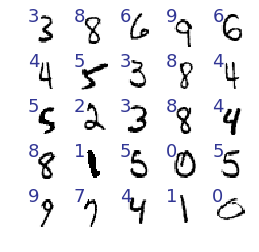

In [156]:
imgrid(images)

In [205]:
zeros  = images[targets==0] # find all "0" images
ones   = images[targets==1] # find all "1" images
sevens = images[targets==7] # find all "7" images

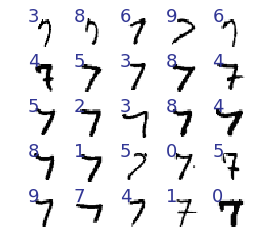

In [206]:
imgrid(sevens)

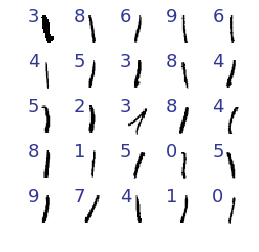

In [159]:
imgrid(ones)

In [161]:
np.unique(ones.iloc[1]) # greyscale values 0..1

array([0.        , 0.04296875, 0.05078125, 0.09375   , 0.09765625,
       0.140625  , 0.15625   , 0.16015625, 0.171875  , 0.27734375,
       0.296875  , 0.30078125, 0.37109375, 0.375     , 0.41015625,
       0.46484375, 0.4765625 , 0.52734375, 0.54296875, 0.546875  ,
       0.58203125, 0.5859375 , 0.6484375 , 0.66015625, 0.73046875,
       0.7578125 , 0.76171875, 0.76953125, 0.7890625 , 0.796875  ,
       0.80078125, 0.82421875, 0.8359375 , 0.8515625 , 0.890625  ,
       0.93359375, 0.96875   , 0.9765625 , 0.98046875, 0.9921875 ])

In [288]:
# combine 0s and 1s to get subset of data
print(f"{len(ones)} ones and {len(sevens)} sevens")
X = np.concatenate([ones, sevens], axis=0)
y = np.concatenate([np.zeros(len(ones)), np.ones(len(sevens))], axis=0)

1064 ones and 1090 sevens


### Fit model

In [303]:
no_regularization = 1/1e100
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lm = LogisticRegression(C=no_regularization, solver='lbfgs')
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    print(lm.score(X_test, y_test))

0.4872389791183295
0.5127610208816705
0.5174013921113689
0.5104408352668214
0.5336426914153132


In [304]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[230   0]
 [201   0]]


In [258]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(1.0, 0.9827586206896551)

In [241]:
for C in np.power(10.0, np.arange(-5,1)):
    print(C, 1/C)

1e-05 99999.99999999999
0.0001 10000.0
0.001 1000.0
0.01 100.0
0.1 10.0
1.0 1.0


In [267]:
for pow in np.arange(6,1,-1):
    lmbda = np.power(10,pow)
    lm = LogisticRegression(C=1/lmbda, solver='lbfgs')
    lm.fit(X_train, y_train)
    print(f"lambda={lmbda} gets R^2 {lm.score(X_test, y_test):.2f}")

lambda=1000000 gets R^2 0.50
lambda=100000 gets R^2 0.95
lambda=10000 gets R^2 0.96
lambda=1000 gets R^2 0.97
lambda=100 gets R^2 0.98


## Regularization

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regularization = 1
lm = LogisticRegression(C=regularization, solver='lbfgs')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(lm.score(X_test, y_test))

0.9930394431554525
